In [343]:
#!unzip -q /content/dataset.zip -d /content/dataset/

In [344]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import to_categorical
from dataset_load import load_data, get_label
from keras.callbacks import  ModelCheckpoint

In [345]:
(X_train, Y_train), (X_test, Y_test)= load_data(test_size = 0.2, path='/content/dataset/')

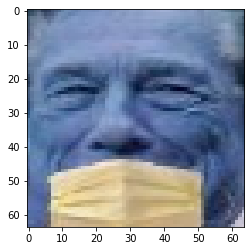

In [346]:
plt.imshow(X_train[5])

In [347]:
Y_train[6]

array([1, 0, 0], dtype=uint8)

In [348]:
drop_prob = 0.6

ks=(7,7)# kernel size
modelo = Sequential()
modelo.add(Conv2D(input_shape=[64,64,3],filters=32,kernel_size=ks,padding='same',activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Conv2D(input_shape=[32,32,3],filters=64,kernel_size=ks, padding='same',activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Flatten())
modelo.add(Dropout(rate=drop_prob))
modelo.add(Dense(units=1024, activation='relu'))
modelo.add(Dropout(rate=drop_prob))
modelo.add(Dense(units=3, activation='softmax'))
modelo.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 64)        9472      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 16384)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)            

In [349]:
epocas = 50
bs = 50
lr = 0.001
optim = Adam(lr)
modelo.compile(loss = 'categorical_crossentropy',optimizer=optim,metrics=['accuracy'])

In [350]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto')

In [351]:
historico = modelo.fit(X_train, Y_train, epochs=epocas,batch_size=bs, validation_split=0.2, callbacks=[checkpoint])


Epoch 1/50
38/40 [===========================>..] - ETA: 0s - loss: 0.8397 - accuracy: 0.6905
Epoch 00001: val_accuracy improved from -inf to 0.88129, saving model to best_model.h5
40/40 [==============================] - 2s 39ms/step - loss: 0.8187 - accuracy: 0.6990 - val_loss: 0.4089 - val_accuracy: 0.8813
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.9180
Epoch 00002: val_accuracy improved from 0.88129 to 0.92555, saving model to best_model.h5
40/40 [==============================] - 1s 34ms/step - loss: 0.2891 - accuracy: 0.9180 - val_loss: 0.2957 - val_accuracy: 0.9256
Epoch 3/50
40/40 [==============================] - ETA: 0s - loss: 0.2588 - accuracy: 0.9235
Epoch 00003: val_accuracy did not improve from 0.92555
40/40 [==============================] - 1s 22ms/step - loss: 0.2588 - accuracy: 0.9235 - val_loss: 0.2642 - val_accuracy: 0.9235
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.9371
Ep

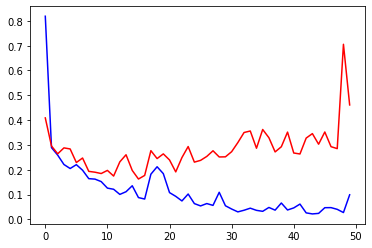

In [352]:
plt.plot(historico.history['loss'],c='b')
plt.plot(historico.history['val_loss'],c='r')
plt.show()

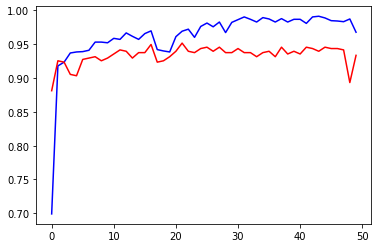

In [353]:
plt.plot(historico.history['accuracy'],c='b')
plt.plot(historico.history['val_accuracy'],c='r')
plt.show()

In [354]:
metricas = modelo.evaluate(X_test,Y_test,verbose=0)
print("Accuracy {:5.3}".format(metricas[1]))


Accuracy  0.95


In [355]:
modelo.save('./last.h5')

In [356]:
modelo = keras.models.load_model('./best_model.h5')

In [357]:
metricas = modelo.evaluate(X_test,Y_test,verbose=0)
print("Accuracy {:5.3}".format(metricas[1]))

Accuracy 0.947


'without_mask'

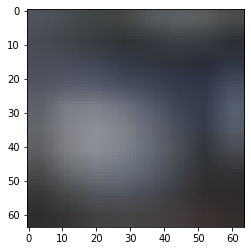

In [358]:
import random
ind = random.randint(0,X_test.shape[0]-1)
plt.imshow(X_test[ind])
get_label(modelo.predict(X_test[ind].reshape(1,64,64,3)))

In [359]:
ind

602